In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import random

np.random.seed(42)

In [23]:
np.random.seed(42)
categories=['Fashion', 'Music', 'Cinema', 'Sports','Games',
            'Celebrities', 'E-Sport', 'Technology', 'Politics']
dates= pd.date_range('2021-01-01', periods=500)

mean = 20000
std_dev = 3000

likes = np.random.normal(mean, std_dev, 15000)

min_value = 1000
max_value = 70000
likes = np.clip(likes, min_value, max_value).astype(int)

Dataset created based on tweets.

Dataset has 15000 tweets and divided into 9 categories.

Dates are distrubuted between 2021-01-01 to 2022-05-15.

Likes are distrubuted between 1000 to 70000 via normal distribution which 20000 mean and 3000 standart deviation.

In [4]:
np.random.seed(42)
random.seed(42)
df=pd.DataFrame({"Categories": [random.choice(categories) for _ in range(15000)],
                 "Like": likes,
                 "Date": [random.choice(dates) for _ in range(15000)]})
df

,Categories,Like,Date
0,Music,21490,2021-09-26
1,Fashion,19585,2021-12-07
2,Games,21943,2021-05-17
3,Sports,24569,2021-10-27
4,Sports,19297,2021-09-29
...,...,...,...
14995,Celebrities,17271,2021-02-19
14996,Fashion,23711,2021-01-07
14997,Politics,23936,2021-01-27
14998,Fashion,17347,2021-09-12


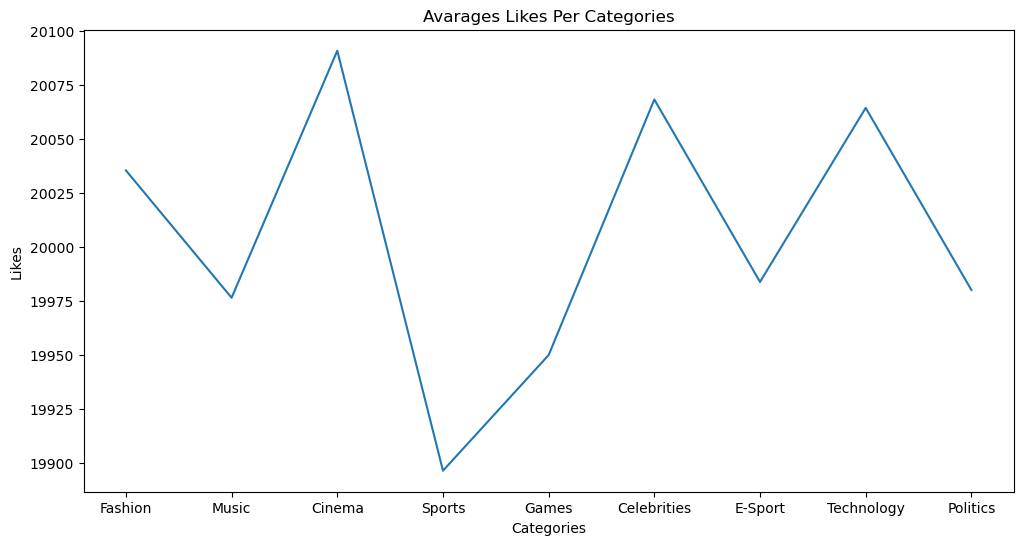

In [5]:
means=[]
for i in categories:
    means.append(df[df['Categories'] == i]['Like'].mean())

fig, ax = plt.subplots(figsize = (12,6))
ax.set(title="Avarages Likes Per Categories",
        xlabel="Categories",
        ylabel="Likes")
ax.plot(categories,means);

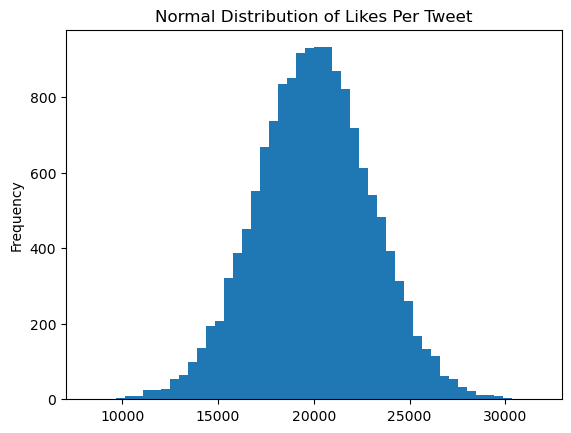

In [6]:
df['Like'].plot.hist(bins=50);
plt.title('Normal Distribution of Likes Per Tweet');

In [7]:
tmp=df.copy()
tmp.set_index('Date',inplace=True)
tmp = tmp.groupby(tmp.index).sum()

#dialy
dialy=tmp.resample('D').asfreq()
dialy=tmp.resample('D').sum()
dialy.drop(columns=['Categories'],inplace=True)

#weekly 
weekly = dialy.resample('W-MON').asfreq()
weekly= dialy.resample('W-MON').sum()

#monthly 
monthly = dialy.resample('M').asfreq()
monthly = dialy.resample('M').sum()

dialy: sum of all topics likes per day

weekly: sum of all topics likes per week

mothly: sum of all topics likes per month

In [8]:
tmp=df.copy()

In [9]:
cat=dialy.resample('D').asfreq()
cat.drop(columns=['Like'],inplace=True)
for i in categories:
    sums=np.empty(0)
    for j in range(0,len(cat)):
        sums=np.append(sums,tmp[(tmp['Categories'] == i) & (tmp['Date'] == dates[j])]['Like'].sum())
    cat[i]=sums


In [10]:
#weekly 
weeklyCat = cat.resample('W-MON').asfreq()
weeklyCat= cat.resample('W-MON').sum()

#monyhly 
monthlyCat = cat.resample('M').asfreq()
monthlyCat = cat.resample('M').sum()

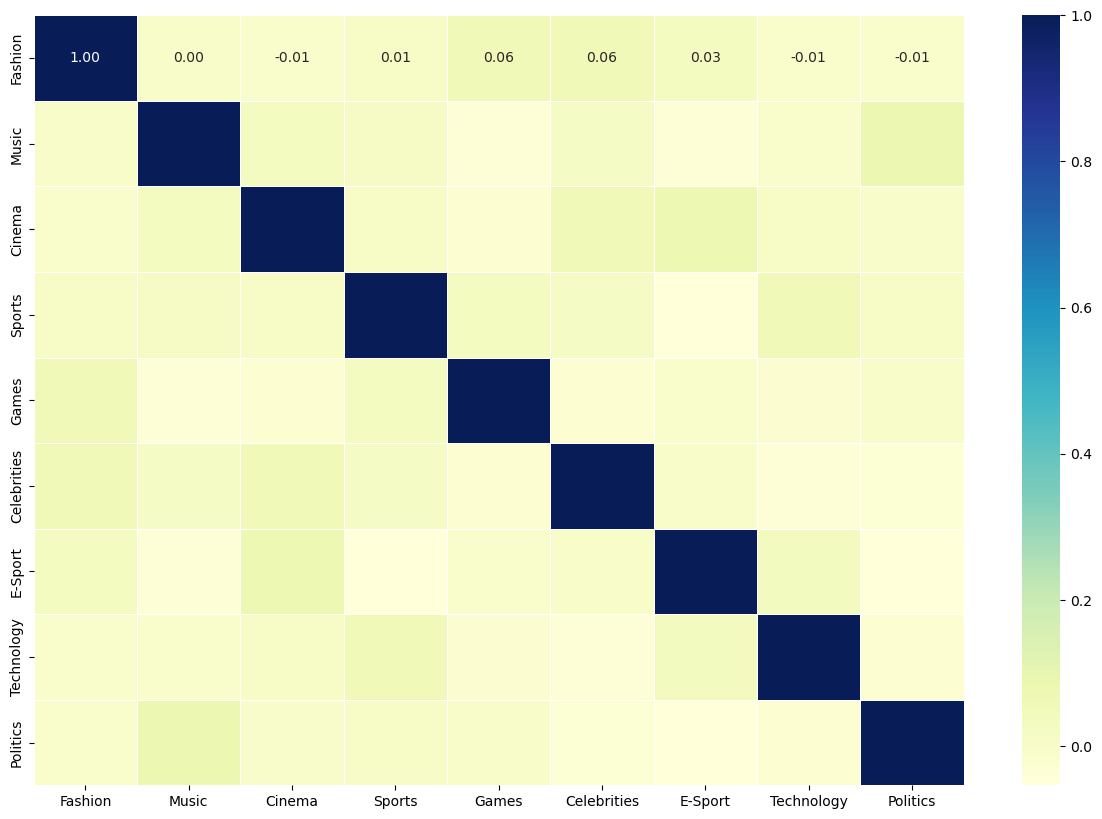

In [11]:
corr_matrix=cat.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

I calculated correlations between categories to analyze related categories.

In [12]:
cor = corr_matrix.unstack()
sortedCor = cor.sort_values(kind="quicksort")
bestPos=sortedCor[-21:-16]
bestNeg=sortedCor[:5];

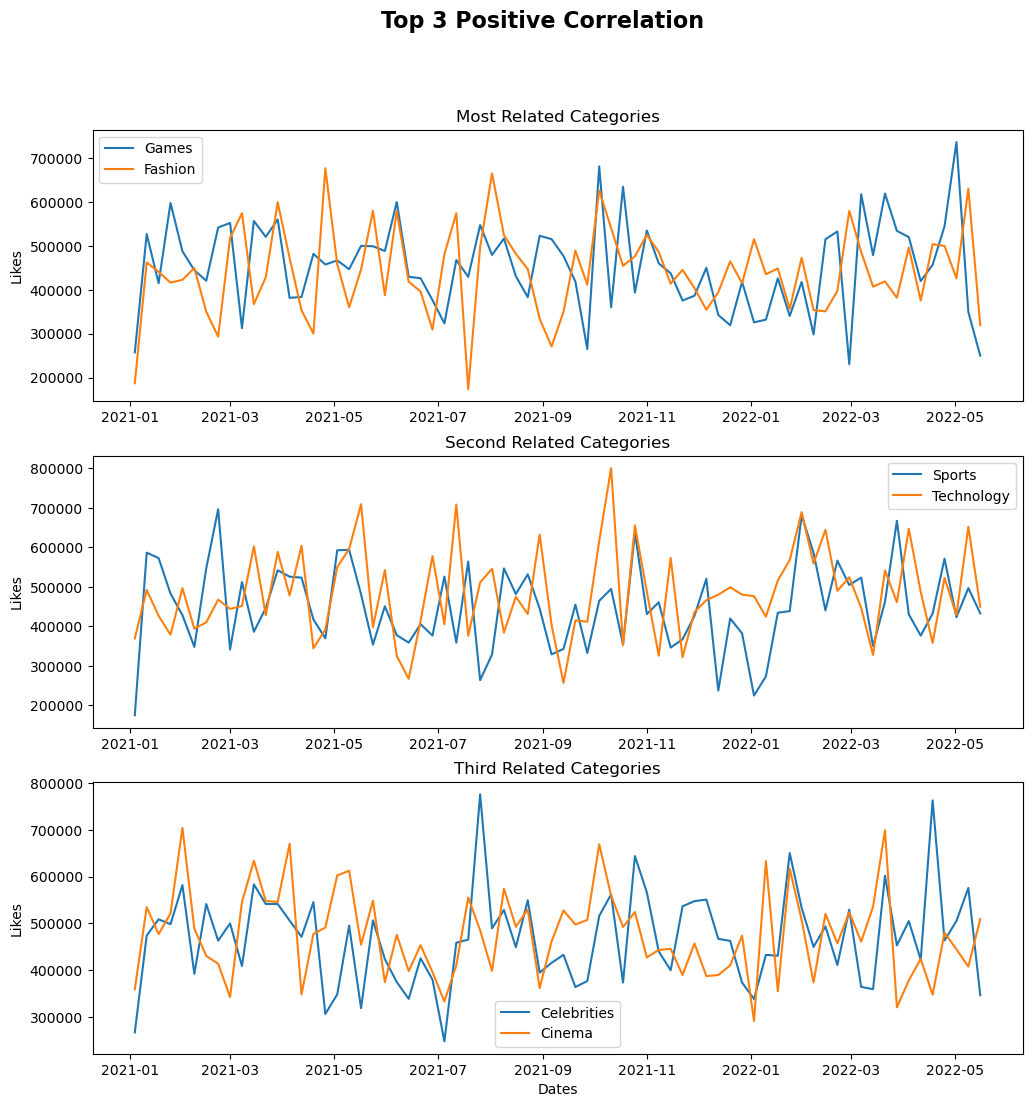

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(12,12))

ax1.plot(weeklyCat.index,weeklyCat[bestPos.index[4][0]], label=bestPos.index[4][0])
ax1.plot(weeklyCat.index,weeklyCat[bestPos.index[4][1]], label=bestPos.index[4][1])
ax1.set(title="Most Related Categories",
        ylabel="Likes")
ax1.legend()

ax2.plot(weeklyCat.index,weeklyCat[bestPos.index[2][0]], label=bestPos.index[2][0])
ax2.plot(weeklyCat.index,weeklyCat[bestPos.index[2][1]], label=bestPos.index[2][1])
ax2.set(title="Second Related Categories",
        ylabel="Likes")
ax2.legend()

ax3.plot(weeklyCat.index,weeklyCat[bestPos.index[0][0]], label=bestPos.index[0][0])
ax3.plot(weeklyCat.index,weeklyCat[bestPos.index[0][1]], label=bestPos.index[0][1])
ax3.set(title="Third Related Categories",
        xlabel="Dates",
        ylabel="Likes")
ax3.legend();

fig.suptitle('Top 3 Positive Correlation',fontsize=16,fontweight='bold');

Top 3 binary categories that have highest positive correlation.

The Games and Fashion category has the highest positive correlation. These two issues have a positive relationship with each other. As one becomes popular, the other also becomes popular. As one issue falls off the agenda, the other also falls.

Because the data is not real, the chart cannot properly represent the correlation link. In real data, the situation described above represents more accurately.

Text(0.5, 0.98, 'Top 3 Negative Correlation')

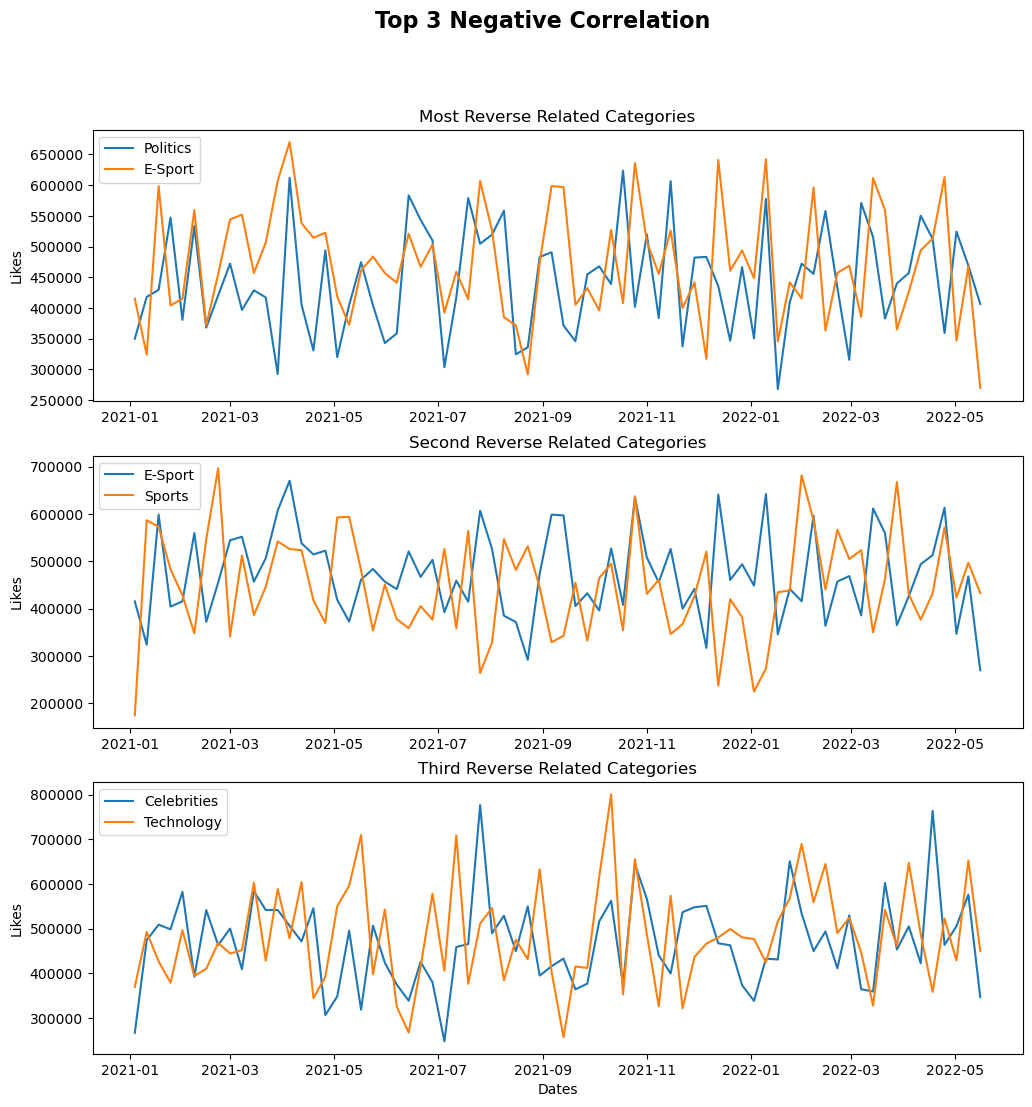

In [14]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(12,12))

ax1.plot(weeklyCat.index,weeklyCat[bestNeg.index[0][0]], label=bestNeg.index[0][0])
ax1.plot(weeklyCat.index,weeklyCat[bestNeg.index[0][1]], label=bestNeg.index[0][1])
ax1.set(title="Most Reverse Related Categories",
        ylabel="Likes")
ax1.legend()

ax2.plot(weeklyCat.index,weeklyCat[bestNeg.index[2][0]], label=bestNeg.index[2][0])
ax2.plot(weeklyCat.index,weeklyCat[bestNeg.index[2][1]], label=bestNeg.index[2][1])
ax2.set(title="Second Reverse Related Categories",
        ylabel="Likes")
ax2.legend()

ax3.plot(weeklyCat.index,weeklyCat[bestNeg.index[4][0]], label=bestNeg.index[4][0])
ax3.plot(weeklyCat.index,weeklyCat[bestNeg.index[4][1]], label=bestNeg.index[4][1])
ax3.set(title="Third Reverse Related Categories",
        xlabel="Dates",
        ylabel="Likes")
ax3.legend();

fig.suptitle('Top 3 Negative Correlation',fontsize=16,fontweight='bold')

Top 3 binary categories that have highest negative correlation.

The E-Sports and Politics category has the highest negative correlation. These two issues have a negative relationship with each other. As one becomes popular, the other falls off the agenda. As one issue falls off the agenda, becomes popular.

Because the data is not real, the chart cannot properly represent the correlation link. In real data, the situation described above represents more accurately.

In [15]:
ratio=monthlyCat.copy()
ratio['Trend 1']=np.empty(len(monthlyCat))
ratio['Trend 2']=np.empty(len(monthlyCat))
ratio['Trend 3']=np.empty(len(monthlyCat))
ratio['Trend 1 Val']=np.empty(len(monthlyCat))
ratio['Trend 2 Val']=np.empty(len(monthlyCat))
ratio['Trend 3 Val']=np.empty(len(monthlyCat))
ratio['Trends']=np.empty(len(monthlyCat))

In [16]:
for i in range(0,len(monthlyCat)):
    totalLikes = monthlyCat.iloc[i].sum()
    ratios=np.empty(0)
    for j in categories:
        rat=monthlyCat.iloc[i][j]/totalLikes
        ratios=np.append(ratios,rat)
    sort=np.sort(ratios)[::-1]
    tr=pd.Series([int(np.where(ratios == sort[0])[0][0]) , int(np.where(ratios == sort[1])[0][0]), int(np.where(ratios == sort[2])[0][0])]).astype(int)
    trVal=pd.Series([sort[0],sort[1],sort[2]])
    s=pd.Series(sort)
    
    trs=pd.Series([ f"{monthlyCat.index[i].date()} \n {categories[np.where(ratios == sort[0])[0][0]]} - {categories[np.where(ratios == sort[1])[0][0]]} - {categories[np.where(ratios == sort[2])[0][0]]}"])
    ratio.iloc[i]=pd.concat([s,tr,trVal,trs], ignore_index=True)

C:\Users\bgraslan\AppData\Local\Temp\ipykernel_4516\2098180471.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-01-31 
 Cinema - Music - Games' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ratio.iloc[i]=pd.concat([s,tr,trVal,trs], ignore_index=True)


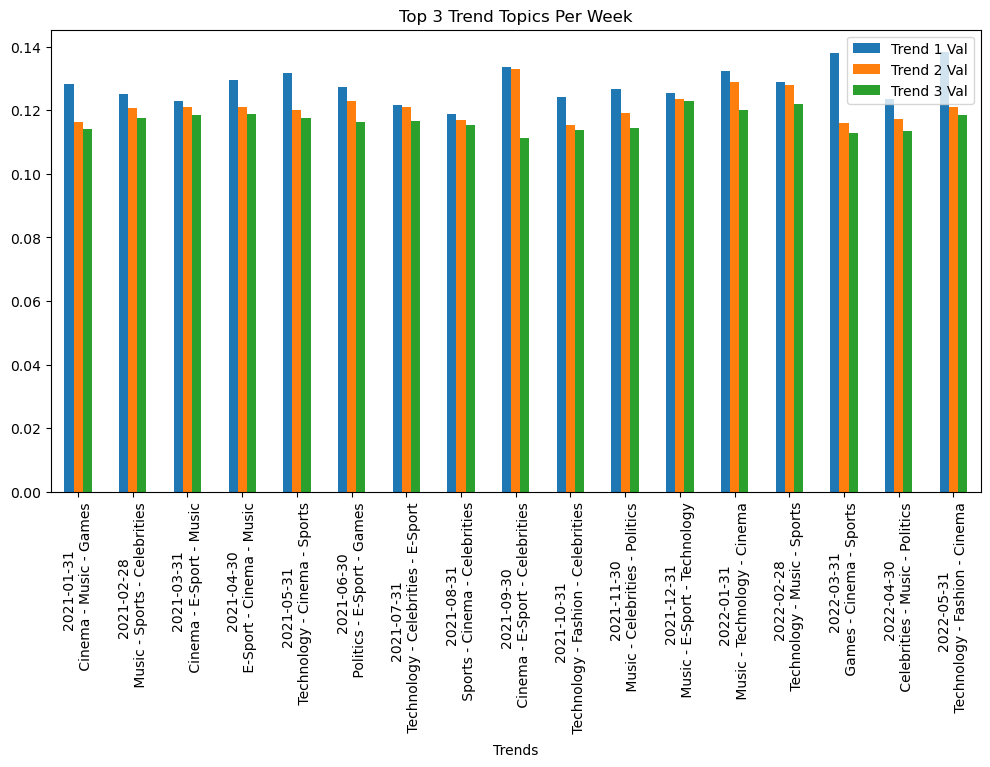

In [17]:
ratio.plot.bar(x='Trends',y=['Trend 1 Val','Trend 2 Val','Trend 3 Val'],figsize=(12,6));
plt.title('Top 3 Trend Topics Per Week');


If we look at the table above, we can see that the ratio of trend topics to other topics is usually closely distributed between 0.11 and 0.13. At the same time, we can observe that on some dates, this distribution exceeds 0.11 and 0.13, and there is a gap between the difference between the trend rates.

When we examine the graph above, we can say that on 2021-01-31, 2021-09-30, we can say that the highly anticipated movies were released on those dates, as Trend 1, cinema, outperformed other trends.



In [18]:
freq=np.zeros(len(categories),dtype=int)

for i in range(0,len(monthlyCat)):
    freq[int(ratio.iloc[i]['Trend 1'])]+=1
    freq[int(ratio.iloc[i]['Trend 2'])]+=1
    freq[int(ratio.iloc[i]['Trend 3'])]+=1


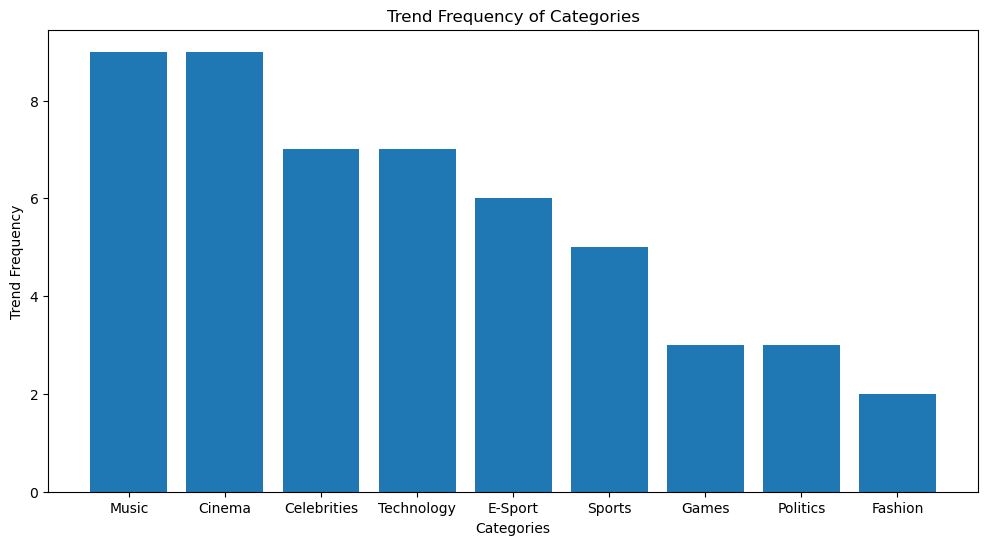

In [19]:
sort= sorted(freq, reverse=True)
sortedCat=categories.copy()
sortedCat = [sortedCat[i] for i in sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)]

fig, ax= plt.subplots(figsize=(12,6))
ax.set(title="Trend Frequency of Categories",
        ylabel="Trend Frequency",
        xlabel="Categories")
ax.bar(sortedCat,sort);


The chart above shows the frequency of topics entering the top trending 3 on a weekly basis.


In [20]:
freqWeighted=np.zeros(len(categories),dtype=int)

for i in range(0,len(monthlyCat)):
    freqWeighted[int(ratio.iloc[i]['Trend 1'])]+=5
    freqWeighted[int(ratio.iloc[i]['Trend 2'])]+=2
    freqWeighted[int(ratio.iloc[i]['Trend 3'])]+=1

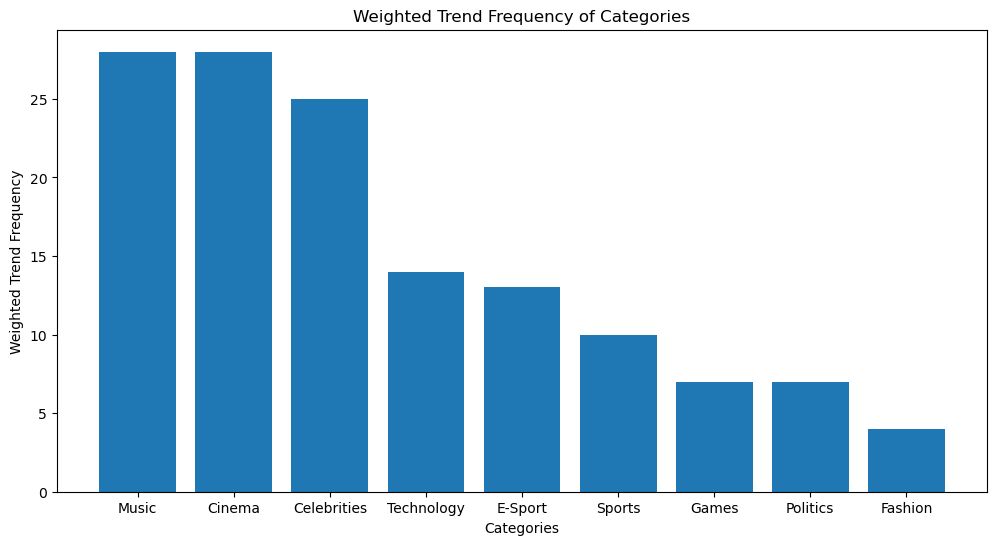

In [21]:
sortW= sorted(freqWeighted, reverse=True)
sortedCatW=categories.copy()
sortedCatW = [sortedCat[i] for i in sorted(range(len(freqWeighted)), key=lambda k: freqWeighted[k], reverse=True)]

fig, ax= plt.subplots(figsize=(12,6))
ax.set(title="Weighted Trend Frequency of Categories",
        ylabel="Weighted Trend Frequency",
        xlabel="Categories")
ax.bar(sortedCat,sortW);

The chart above shows the weekly frequency of topics entering the top 3 trends according to the weight of the trend order.
    
In the previous graph, the effect of trends 1, 2 and 3 on the frequency of each other is not significant, whereas in this graph, being in trend 1 is more important than being in trend 2 and being in trend 2 is more important than being in trend 3. 

If we examine the 2 frequency graphs above. We can see that music and cinema are always on the agenda, and when they are on the agenda, they are ahead of other trending topics.
Although celebrities and technology topics have the same frequency, we can see that when the topic of celebrities is on the agenda, it is ahead of other topics and technology is a little more in the background.

If we make an inference for the imaginary society produced with pseudo data. From the graph of the trend frequency of music and cinema, we can say that it is a society where art is widely consumed and produced, and from the weighted frequency graph, we can say that it is a society that attaches great importance to art.

Although the technology issue has a high value in the frequency graph, it has a lower value in the weighted graph, indicating that a large segment of the society follows technological developments. 

We can say that since the issue of politics has a low value in the frequency table, there is no interest in politics in the general society, and since it has a low value in the weighted chart, there is not much political development.

We can say that the welfare level of this imaginary society, created because art and technology are widespread and important issues in society in general, and politics is ignored, is high.